## 시계열 처리

In [2]:
import pandas as pd
import numpy as np

In [ ]:
idx = pd.DatetimeIndex(['2019-01-01', '2020-01-01', '2020-02-01', '2020-02-02', '2020-03-01'])
s = pd.Series([0, 1, 2, 3, 4], index=idx)
s

2019-01-01    0
2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [ ]:
s['2020-01-01':]

2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [ ]:
s[:'2020-01-01']

2019-01-01    0
2020-01-01    1
dtype: int64

In [ ]:
s['2019']

2019-01-01    0
dtype: int64

### 시계열 데이터 구조


> 타임스탬프 (timestamp)

*   Pandas의 Timestamp 타입 제공
*   파이썬 datetime 대체 타입
*   numpy.datetime64 타입 기반
*   DatetimeIndex 인덱스 구조

> 기간 (time period)

*   Pandas의 Period 타입 제공
*   numpy.datetime64 기반
*   PeriodIndex 인덱스 구조

> 시간 델타 또는 지속 기간

*   Pandas의 Timedelta 타입 제공
*   파이썬 datetime.timedelta 대체 타입
*   numpy.timedelta64 타입 기반
*   TimedeltaIndex 인덱스 구조 



In [ ]:
from datetime import datetime
dates = pd.to_datetime(['12-12-2019', datetime(2020, 1, 1), '2nd of Feb, 2020', '2020-Mar-4', '20200701'])
dates

# 여러 형태의 문자열을 datetime으로 파싱해줌

DatetimeIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
               '2020-07-01'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
dates.to_period('D')

PeriodIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
             '2020-07-01'],
            dtype='period[D]', freq='D')

In [ ]:
dates - dates[0]

TimedeltaIndex(['0 days', '20 days', '52 days', '83 days', '202 days'], dtype='timedelta64[ns]', freq=None)

In [ ]:
pd.date_range('2020-01-01', '2020-07-01')    # freq='D' 단위로 range 계산

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [ ]:
pd.date_range('2020-01-01', periods=7)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2020-01-01', periods=7, freq='M')    # freq='M'은 말일 출력 (MonthEnd)

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
pd.date_range('2020-01-01', periods=7, freq='H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [ ]:
idx = pd.to_datetime(['2020-01-01 12:00:00', '2020-01-02 00:00:00'] + [None])
idx

# NaT: Not a Time

DatetimeIndex(['2020-01-01 12:00:00', '2020-01-02 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [ ]:
idx[2]

NaT

In [ ]:
pd.isnull(idx)

array([False, False,  True])

### 시계열 기본

In [ ]:
dates = [datetime(2020, 1, 1), datetime(2020, 1, 2), datetime(2020, 1, 4), datetime(2020, 1, 7),
          datetime(2020, 1, 10), datetime(2020, 1, 11), datetime(2020, 1, 15)]
dates

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0)]

In [ ]:
ts = pd.Series(np.random.randn(7), index=dates)
ts

2020-01-01    2.060433
2020-01-02    0.742213
2020-01-04   -0.032958
2020-01-07    0.705069
2020-01-10   -0.331650
2020-01-11   -0.776205
2020-01-15   -1.427253
dtype: float64

In [ ]:
ts.index    # DatetimeIndex 출력

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-04', '2020-01-07',
               '2020-01-10', '2020-01-11', '2020-01-15'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
ts.index[0]    # Timestamp 객체로 출력

Timestamp('2020-01-01 00:00:00')

In [ ]:
ts[ts.index[2]]    # 해당 인덱스의 값을 보고 싶을 경우

-0.03295818213641964

In [ ]:
ts['20200104']

-0.03295818213641964

In [ ]:
ts['1/4/2020']

-0.03295818213641964

In [ ]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('2017-10-01', periods=1000))
ts

2017-10-01   -2.146922
2017-10-02   -0.900079
2017-10-03   -0.985601
2017-10-04   -0.874722
2017-10-05    1.370399
                ...   
2020-06-22   -0.550327
2020-06-23    0.556857
2020-06-24   -0.713224
2020-06-25    0.687802
2020-06-26    0.051840
Freq: D, Length: 1000, dtype: float64

In [ ]:
ts['2020']

2020-01-01    1.588258
2020-01-02   -0.595179
2020-01-03    0.287733
2020-01-04    1.627439
2020-01-05    0.849788
                ...   
2020-06-22   -0.550327
2020-06-23    0.556857
2020-06-24   -0.713224
2020-06-25    0.687802
2020-06-26    0.051840
Freq: D, Length: 178, dtype: float64

In [ ]:
ts['2020-06']

2020-06-01   -1.224274
2020-06-02   -0.228151
2020-06-03    1.503122
2020-06-04    2.514207
2020-06-05   -1.447660
2020-06-06    0.139697
2020-06-07    0.863321
2020-06-08   -0.345602
2020-06-09    1.649731
2020-06-10    0.401416
2020-06-11   -0.058855
2020-06-12   -1.289796
2020-06-13    0.244703
2020-06-14   -0.849523
2020-06-15   -0.298910
2020-06-16   -1.950182
2020-06-17    0.043503
2020-06-18    0.383554
2020-06-19   -0.224895
2020-06-20   -0.235995
2020-06-21   -0.757512
2020-06-22   -0.550327
2020-06-23    0.556857
2020-06-24   -0.713224
2020-06-25    0.687802
2020-06-26    0.051840
Freq: D, dtype: float64

In [ ]:
ts[datetime(2020, 6, 20):]

2020-06-20   -0.235995
2020-06-21   -0.757512
2020-06-22   -0.550327
2020-06-23    0.556857
2020-06-24   -0.713224
2020-06-25    0.687802
2020-06-26    0.051840
Freq: D, dtype: float64

In [ ]:
ts['2020-06-10':'2020-06-20']

2020-06-10    0.401416
2020-06-11   -0.058855
2020-06-12   -1.289796
2020-06-13    0.244703
2020-06-14   -0.849523
2020-06-15   -0.298910
2020-06-16   -1.950182
2020-06-17    0.043503
2020-06-18    0.383554
2020-06-19   -0.224895
2020-06-20   -0.235995
Freq: D, dtype: float64

In [ ]:
tdf = pd.DataFrame(np.random.randn(1000, 4),
                   index=pd.date_range('2017-10-01', periods=1000),
                   columns=['A','B','C','D'])
tdf

,A,B,C,D
2017-10-01,0.059291,-0.379516,-0.064028,-1.529105
2017-10-02,0.541233,-1.892744,-0.596851,-0.515127
2017-10-03,0.819730,-0.245926,1.095140,-0.293275
2017-10-04,0.591716,1.732876,-1.433145,-0.406512
2017-10-05,-0.070071,-0.308579,0.725965,-0.351740
...,...,...,...,...
2020-06-22,-1.856548,0.945665,1.614184,-0.380414
2020-06-23,-0.459059,0.168691,0.312692,-1.480519
2020-06-24,-1.153985,-0.576701,-0.273606,-1.060646
2020-06-25,-0.059917,-1.136168,0.056622,-1.003771


In [ ]:
tdf['2020']

,A,B,C,D
2020-01-01,1.161481,-0.819448,0.406128,-0.721422
2020-01-02,-0.393345,0.334846,-0.014751,-0.995276
2020-01-03,-0.612604,0.376574,0.495205,-0.749373
2020-01-04,0.697009,-1.984945,-0.816079,0.023069
2020-01-05,1.010242,1.124466,-0.576574,-0.491743
...,...,...,...,...
2020-06-22,-1.856548,0.945665,1.614184,-0.380414
2020-06-23,-0.459059,0.168691,0.312692,-1.480519
2020-06-24,-1.153985,-0.576701,-0.273606,-1.060646
2020-06-25,-0.059917,-1.136168,0.056622,-1.003771


In [ ]:
tdf.loc['2020-06']

,A,B,C,D
2020-06-01,-0.049534,-1.750846,1.928798,0.121021
2020-06-02,1.649961,-1.179158,1.463774,0.602742
2020-06-03,0.356712,1.198901,-0.542259,0.720069
2020-06-04,0.876127,-1.885888,-0.238469,-0.223228
2020-06-05,0.378619,-0.464535,0.100493,0.804649
2020-06-06,0.042554,1.474500,-0.008824,-2.043758
2020-06-07,0.048823,-0.299672,0.414610,1.229664
2020-06-08,-0.320322,0.586450,0.267153,-0.177392
2020-06-09,0.460765,0.024276,-0.282406,0.590058
2020-06-10,-0.940574,-0.258408,-0.594257,-1.521045


In [ ]:
tdf['2020-06-20':]

,A,B,C,D
2020-06-20,1.378312,0.242895,-1.064665,2.083792
2020-06-21,0.750526,-0.518743,0.451860,-0.555852
2020-06-22,-1.856548,0.945665,1.614184,-0.380414
2020-06-23,-0.459059,0.168691,0.312692,-1.480519
2020-06-24,-1.153985,-0.576701,-0.273606,-1.060646
2020-06-25,-0.059917,-1.136168,0.056622,-1.003771
2020-06-26,-0.319720,-1.308195,-0.747232,-1.520606


In [ ]:
tdf['C']

2017-10-01   -0.064028
2017-10-02   -0.596851
2017-10-03    1.095140
2017-10-04   -1.433145
2017-10-05    0.725965
                ...   
2020-06-22    1.614184
2020-06-23    0.312692
2020-06-24   -0.273606
2020-06-25    0.056622
2020-06-26   -0.747232
Freq: D, Name: C, Length: 1000, dtype: float64

In [ ]:
ts = pd.Series(np.random.randn(10),
               index=pd.DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-02', '2020-01-02', '2020-01-03',
                                       '2020-01-04', '2020-01-05', '2020-01-05', '2020-01-06', '2020-01-07']))
ts

2020-01-01    0.652463
2020-01-01   -0.159863
2020-01-02   -1.097558
2020-01-02   -1.912000
2020-01-03   -1.050483
2020-01-04   -1.017329
2020-01-05    0.396085
2020-01-05    0.008334
2020-01-06    1.190992
2020-01-07    0.084263
dtype: float64

In [ ]:
ts.index.is_unique

False

In [ ]:
ts['2020-01-01']

2020-01-01    0.652463
2020-01-01   -0.159863
dtype: float64

In [ ]:
ts.groupby(level=0).mean()    # 중복값은 mean()으로 처리

2020-01-01    0.246300
2020-01-02   -1.504779
2020-01-03   -1.050483
2020-01-04   -1.017329
2020-01-05    0.202209
2020-01-06    1.190992
2020-01-07    0.084263
dtype: float64

In [ ]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [ ]:
pd.date_range(start='2020-01-01', periods=10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range(end='2020-07-01', periods=10)

DatetimeIndex(['2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2020-07-01', '2020-07-07', freq='B')    # freq='B'는 영업일만 출력

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-06',
               '2020-07-07'],
              dtype='datetime64[ns]', freq='B')

### 주기와 오프셋

> s: 초  
> T: 분  
> H: 시간  
> D: 일(day)  
> B: 주말이 아닌 평일  
> W: 주(일요일)  
> W-MON: 주(월요일)  
> M: 각 달(month)의 마지막 날   
> MS: 각 달의 첫날  
> BM: 주말이 아닌 평일 중에서 각 달의 마지막 날  
> BMS: 주말이 아닌 평일 중에서 각 달의 첫날  
> WOM-2THU: 각 달의 두번째 목요일  
> Q-JAN: 각 분기의 첫달의 마지막 날  
> Q-DEC: 각 분기의 마지막 달의 마지막 날  




In [ ]:
pd.timedelta_range(0, periods=12, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [ ]:
pd.timedelta_range(0, periods=60, freq='T')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00', '0 days 00:10:00', '0 days 00:11:00',
                '0 days 00:12:00', '0 days 00:13:00', '0 days 00:14:00',
                '0 days 00:15:00', '0 days 00:16:00', '0 days 00:17:00',
                '0 days 00:18:00', '0 days 00:19:00', '0 days 00:20:00',
                '0 days 00:21:00', '0 days 00:22:00', '0 days 00:23:00',
                '0 days 00:24:00', '0 days 00:25:00', '0 days 00:26:00',
                '0 days 00:27:00', '0 days 00:28:00', '0 days 00:29:00',
                '0 days 00:30:00', '0 days 00:31:00', '0 days 00:32:00',
                '0 days 00:33:00', '0 days 00:34:00', '0 days 00:35:00',
                '0 days 00:36:00', '0 days 00:37:00', '0 days 00:38:00',
                '0 days 00:39:00', '0 days 00:40:00

In [ ]:
pd.timedelta_range(0, periods=10, freq='1H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:30:00', '0 days 03:00:00',
                '0 days 04:30:00', '0 days 06:00:00', '0 days 07:30:00',
                '0 days 09:00:00', '0 days 10:30:00', '0 days 12:00:00',
                '0 days 13:30:00'],
               dtype='timedelta64[ns]', freq='90T')

In [ ]:
pd.date_range('2020-01-01', periods=20, freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
pd.date_range('2020-01-01', periods=30, freq='2H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 02:00:00',
               '2020-01-01 04:00:00', '2020-01-01 06:00:00',
               '2020-01-01 08:00:00', '2020-01-01 10:00:00',
               '2020-01-01 12:00:00', '2020-01-01 14:00:00',
               '2020-01-01 16:00:00', '2020-01-01 18:00:00',
               '2020-01-01 20:00:00', '2020-01-01 22:00:00',
               '2020-01-02 00:00:00', '2020-01-02 02:00:00',
               '2020-01-02 04:00:00', '2020-01-02 06:00:00',
               '2020-01-02 08:00:00', '2020-01-02 10:00:00',
               '2020-01-02 12:00:00', '2020-01-02 14:00:00',
               '2020-01-02 16:00:00', '2020-01-02 18:00:00',
               '2020-01-02 20:00:00', '2020-01-02 22:00:00',
               '2020-01-03 00:00:00', '2020-01-03 02:00:00',
               '2020-01-03 04:00:00', '2020-01-03 06:00:00',
               '2020-01-03 08:00:00', '2020-01-03 10:00:00'],
              dtype='datetime64[ns]', freq='2H')

In [ ]:
pd.date_range('2020-01-01', periods=20, freq='S')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               '2020-01-01 00:00:10', '2020-01-01 00:00:11',
               '2020-01-01 00:00:12', '2020-01-01 00:00:13',
               '2020-01-01 00:00:14', '2020-01-01 00:00:15',
               '2020-01-01 00:00:16', '2020-01-01 00:00:17',
               '2020-01-01 00:00:18', '2020-01-01 00:00:19'],
              dtype='datetime64[ns]', freq='S')

### 시프트(Shift)

In [ ]:
ts = pd.Series(np.random.randn(5),
               index=pd.date_range('2020-01-01', periods=5, freq='B'))
ts

2020-01-01   -2.060810
2020-01-02   -0.887682
2020-01-03    1.035310
2020-01-06   -1.032190
2020-01-07   -0.176242
Freq: B, dtype: float64

In [ ]:
ts.shift(1)

2020-01-01         NaN
2020-01-02   -2.060810
2020-01-03   -0.887682
2020-01-06    1.035310
2020-01-07   -1.032190
Freq: B, dtype: float64

In [ ]:
ts.shift(3)

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06   -2.060810
2020-01-07   -0.887682
Freq: B, dtype: float64

In [ ]:
ts.shift(-2)

2020-01-01    1.035310
2020-01-02   -1.032190
2020-01-03   -0.176242
2020-01-06         NaN
2020-01-07         NaN
Freq: B, dtype: float64

In [ ]:
ts.shift(3, freq='B')

2020-01-06   -2.060810
2020-01-07   -0.887682
2020-01-08    1.035310
2020-01-09   -1.032190
2020-01-10   -0.176242
Freq: B, dtype: float64

In [ ]:
ts.shift(2, freq='W')    # 주는 일요일부터 계산

2020-01-12   -2.060810
2020-01-12   -0.887682
2020-01-12    1.035310
2020-01-19   -1.032190
2020-01-19   -0.176242
dtype: float64

### 시간대 처리


*   국제표준시(Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대 처리
*   전 세계의 시간대 정보를 모아놓은 올슨 데이터베이스를 활용한 라이브러리인 pytz 사용



In [ ]:
import pytz
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [ ]:
tz = pytz.timezone('Asia/Seoul')

In [ ]:
dinx = pd.date_range('2020-01-01 09:00', periods=7, freq='B')
ts = pd.Series(np.random.randn(len(dinx)), index=dinx)
ts

2020-01-01 09:00:00   -1.460512
2020-01-02 09:00:00   -0.586639
2020-01-03 09:00:00   -0.058384
2020-01-06 09:00:00   -0.165332
2020-01-07 09:00:00    1.101754
2020-01-08 09:00:00   -0.430405
2020-01-09 09:00:00   -2.352608
Freq: B, dtype: float64

In [ ]:
pd.date_range('2020-01-01 09:00', periods=7, freq='B', tz='UTC')

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [ ]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-01-01 09:00:00+00:00   -1.460512
2020-01-02 09:00:00+00:00   -0.586639
2020-01-03 09:00:00+00:00   -0.058384
2020-01-06 09:00:00+00:00   -0.165332
2020-01-07 09:00:00+00:00    1.101754
2020-01-08 09:00:00+00:00   -0.430405
2020-01-09 09:00:00+00:00   -2.352608
Freq: B, dtype: float64

In [ ]:
ts_utc.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [ ]:
ts_utc.tz_convert('Asia/Seoul')

2020-01-01 18:00:00+09:00   -1.460512
2020-01-02 18:00:00+09:00   -0.586639
2020-01-03 18:00:00+09:00   -0.058384
2020-01-06 18:00:00+09:00   -0.165332
2020-01-07 18:00:00+09:00    1.101754
2020-01-08 18:00:00+09:00   -0.430405
2020-01-09 18:00:00+09:00   -2.352608
Freq: B, dtype: float64

In [ ]:
ts_seoul = ts.tz_localize('Asia/Seoul')
ts_seoul

2020-01-01 09:00:00+09:00   -1.460512
2020-01-02 09:00:00+09:00   -0.586639
2020-01-03 09:00:00+09:00   -0.058384
2020-01-06 09:00:00+09:00   -0.165332
2020-01-07 09:00:00+09:00    1.101754
2020-01-08 09:00:00+09:00   -0.430405
2020-01-09 09:00:00+09:00   -2.352608
dtype: float64

In [ ]:
ts_seoul.tz_convert('UTC')

2020-01-01 00:00:00+00:00   -1.460512
2020-01-02 00:00:00+00:00   -0.586639
2020-01-03 00:00:00+00:00   -0.058384
2020-01-06 00:00:00+00:00   -0.165332
2020-01-07 00:00:00+00:00    1.101754
2020-01-08 00:00:00+00:00   -0.430405
2020-01-09 00:00:00+00:00   -2.352608
dtype: float64

In [ ]:
ts_seoul.tz_convert('Europe/Berlin')

2020-01-01 01:00:00+01:00   -1.460512
2020-01-02 01:00:00+01:00   -0.586639
2020-01-03 01:00:00+01:00   -0.058384
2020-01-06 01:00:00+01:00   -0.165332
2020-01-07 01:00:00+01:00    1.101754
2020-01-08 01:00:00+01:00   -0.430405
2020-01-09 01:00:00+01:00   -2.352608
dtype: float64

In [ ]:
ts.index.tz_localize('America/New_York')

DatetimeIndex(['2020-01-01 09:00:00-05:00', '2020-01-02 09:00:00-05:00',
               '2020-01-03 09:00:00-05:00', '2020-01-06 09:00:00-05:00',
               '2020-01-07 09:00:00-05:00', '2020-01-08 09:00:00-05:00',
               '2020-01-09 09:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [ ]:
stamp = pd.Timestamp('2020-01-01 12:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

Timestamp('2020-01-01 12:00:00+0000', tz='UTC')

In [ ]:
stamp_utc.value

1577880000000000000

In [ ]:
stamp_utc.tz_convert('Asia/Seoul')

Timestamp('2020-01-01 21:00:00+0900', tz='Asia/Seoul')

In [ ]:
stamp_utc.tz_convert('Asia/Seoul').value

1577880000000000000

In [ ]:
stamp_ny = pd.Timestamp('2020-01-01 12:00', tz='America/New_York')
stamp_ny

Timestamp('2020-01-01 12:00:00-0500', tz='America/New_York')

In [ ]:
stamp_utc.value

1577880000000000000

In [ ]:
stamp_ny.value

1577898000000000000

In [ ]:
stamp_utc.tz_convert('Asia/Shanghai')

Timestamp('2020-01-01 20:00:00+0800', tz='Asia/Shanghai')

In [ ]:
stamp = pd.Timestamp('2020-01-01 12:00', tz='Asia/Seoul')
stamp

Timestamp('2020-01-01 12:00:00+0900', tz='Asia/Seoul')

In [ ]:
from pandas.tseries.offsets import Hour
stamp + Hour()

Timestamp('2020-01-01 13:00:00+0900', tz='Asia/Seoul')

In [ ]:
stamp + 3 * Hour()

Timestamp('2020-01-01 15:00:00+0900', tz='Asia/Seoul')

In [ ]:
ts_utc

2020-01-01 09:00:00+00:00   -1.460512
2020-01-02 09:00:00+00:00   -0.586639
2020-01-03 09:00:00+00:00   -0.058384
2020-01-06 09:00:00+00:00   -0.165332
2020-01-07 09:00:00+00:00    1.101754
2020-01-08 09:00:00+00:00   -0.430405
2020-01-09 09:00:00+00:00   -2.352608
Freq: B, dtype: float64

In [ ]:
ts1 = ts_utc[:5].tz_convert('Europe/Berlin')
ts2 = ts_utc[2:].tz_convert('America/New_York')
ts = ts1 + ts2

In [ ]:
ts.index    # 다른 나라의 시간대를 연산하기 위해 UTC로 자동 변환됨

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

### 기간과 기간 연산

In [ ]:
p = pd.Period(2020, freq='A-JAN')
p

Period('2020', 'A-JAN')

In [ ]:
p + 2

Period('2022', 'A-JAN')

In [ ]:
p - 3

Period('2017', 'A-JAN')

In [ ]:
p1 = pd.Period(2010, freq='A-JAN')
p2 = pd.Period(2020, freq='A-JAN')
p2 - p1

<10 * YearEnds: month=1>

In [ ]:
pr = pd.period_range('2020-01-01', '2020-06-30', freq='M')

In [ ]:
pd.Series(np.random.randn(6), index=pr)

2020-01    0.449694
2020-02    0.804496
2020-03   -0.256033
2020-04   -0.520565
2020-05    0.381098
2020-06    1.738526
Freq: M, dtype: float64

In [ ]:
pidx = pd.PeriodIndex(['2020-1', '2020-2', '2020-4'], freq='M')
pidx

PeriodIndex(['2020-01', '2020-02', '2020-04'], dtype='period[M]', freq='M')

In [ ]:
p = pd.Period('2020', freq='A-FEB')
p

Period('2020', 'A-FEB')

In [ ]:
p.asfreq('M', how='start')

Period('2019-03', 'M')

In [ ]:
p.asfreq('M', how='end')

Period('2020-02', 'M')

In [ ]:
p = pd.Period('2020', freq='A-OCT')
p

Period('2020', 'A-OCT')

In [ ]:
p.asfreq('M', how='start')

Period('2019-11', 'M')

In [ ]:
p.asfreq('M', how='end')

Period('2020-10', 'M')

In [ ]:
pr = pd.period_range('2010', '2020', freq='A-JAN')
ts = pd.Series(np.random.randn(len(pr)), index=pr)
ts

2010   -1.261515
2011   -0.143747
2012   -1.464422
2013   -1.061528
2014   -0.595445
2015   -1.075446
2016    1.020316
2017    0.824247
2018   -0.337803
2019   -1.077222
2020   -0.699991
Freq: A-JAN, dtype: float64

In [ ]:
ts.asfreq('M', how='start')

2009-02   -1.261515
2010-02   -0.143747
2011-02   -1.464422
2012-02   -1.061528
2013-02   -0.595445
2014-02   -1.075446
2015-02    1.020316
2016-02    0.824247
2017-02   -0.337803
2018-02   -1.077222
2019-02   -0.699991
Freq: M, dtype: float64

In [ ]:
ts.asfreq('B', how='end')

2010-01-29   -1.261515
2011-01-31   -0.143747
2012-01-31   -1.464422
2013-01-31   -1.061528
2014-01-31   -0.595445
2015-01-30   -1.075446
2016-01-29    1.020316
2017-01-31    0.824247
2018-01-31   -0.337803
2019-01-31   -1.077222
2020-01-31   -0.699991
Freq: B, dtype: float64

In [ ]:
p = pd.Period('2020Q2', freq='Q-JAN')
p

Period('2020Q2', 'Q-JAN')

In [ ]:
p.asfreq('D', 'start')

Period('2019-05-01', 'D')

In [ ]:

p.asfreq('D', 'end')

Period('2019-07-31', 'D')

In [ ]:
pr = pd.period_range('2019Q3', '2020Q3', freq='Q-JAN')
ts = pd.Series(np.arange(len(pr)), index=pr)
ts

2019Q3    0
2019Q4    1
2020Q1    2
2020Q2    3
2020Q3    4
Freq: Q-JAN, dtype: int64

In [ ]:
pr = pd.date_range('2020-01-01', periods=5, freq='Q-JAN')
ts = pd.Series(np.random.randn(5), index=pr)
ts

2020-01-31    0.015674
2020-04-30   -0.157006
2020-07-31   -0.468443
2020-10-31   -0.780721
2021-01-31   -1.706946
Freq: Q-JAN, dtype: float64

In [ ]:
ts.to_period()

2020Q4    0.015674
2021Q1   -0.157006
2021Q2   -0.468443
2021Q3   -0.780721
2021Q4   -1.706946
Freq: Q-JAN, dtype: float64

In [ ]:
pr = pd.date_range('2020-01-01', periods=5, freq='D')
ts = pd.Series(np.random.randn(5), index=pr)
ts

2020-01-01   -0.934867
2020-01-02    0.335048
2020-01-03    1.499329
2020-01-04   -0.487532
2020-01-05   -0.554995
Freq: D, dtype: float64

In [ ]:
p = ts.to_period('M')
p

2020-01   -0.934867
2020-01    0.335048
2020-01    1.499329
2020-01   -0.487532
2020-01   -0.554995
Freq: M, dtype: float64

In [ ]:
p.to_timestamp(how='start')

2020-01-01   -0.934867
2020-01-01    0.335048
2020-01-01    1.499329
2020-01-01   -0.487532
2020-01-01   -0.554995
dtype: float64

### 리샘플링(Resampling)

* 리샘플링(Resampling): 시계열의 빈도 변환
* 다운샘플링(Down sampling): 상위 빈도 데이터를 하위 빈도 데이터로 집계
* 업샘플링(Up sampling): 하위 빈도 데이터를 상위 빈도 데이터로 집계

In [3]:
dr = pd.date_range('2020-01-01', periods=200, freq='D')
ts = pd.Series(np.random.randn(len(dr)), index=dr)
ts

2020-01-01    2.095461
2020-01-02    1.672644
2020-01-03    0.644678
2020-01-04    0.243857
2020-01-05    0.572887
                ...   
2020-07-14    1.029033
2020-07-15    1.216704
2020-07-16   -1.119623
2020-07-17    2.041712
2020-07-18   -0.173598
Freq: D, Length: 200, dtype: float64

In [4]:
ts.resample('M').mean()

2020-01-31   -0.098596
2020-02-29   -0.064287
2020-03-31    0.102875
2020-04-30    0.198879
2020-05-31   -0.065445
2020-06-30   -0.200468
2020-07-31   -0.035518
Freq: M, dtype: float64

In [5]:
ts.resample('M', kind='period').mean()

2020-01   -0.098596
2020-02   -0.064287
2020-03    0.102875
2020-04    0.198879
2020-05   -0.065445
2020-06   -0.200468
2020-07   -0.035518
Freq: M, dtype: float64

In [6]:
dr = pd.date_range('2020-01-01', periods=10, freq='T')
ts = pd.Series(np.arange(10), index=dr)
ts

2020-01-01 00:00:00    0
2020-01-01 00:01:00    1
2020-01-01 00:02:00    2
2020-01-01 00:03:00    3
2020-01-01 00:04:00    4
2020-01-01 00:05:00    5
2020-01-01 00:06:00    6
2020-01-01 00:07:00    7
2020-01-01 00:08:00    8
2020-01-01 00:09:00    9
Freq: T, dtype: int64

In [7]:
ts.resample('2T', closed='left').sum()

2020-01-01 00:00:00     1
2020-01-01 00:02:00     5
2020-01-01 00:04:00     9
2020-01-01 00:06:00    13
2020-01-01 00:08:00    17
Freq: 2T, dtype: int64

In [8]:
ts.resample('2T', closed='right').sum()

2019-12-31 23:58:00     0
2020-01-01 00:00:00     3
2020-01-01 00:02:00     7
2020-01-01 00:04:00    11
2020-01-01 00:06:00    15
2020-01-01 00:08:00     9
Freq: 2T, dtype: int64

In [9]:
ts.resample('2T', closed='right', label='right').sum()

2020-01-01 00:00:00     0
2020-01-01 00:02:00     3
2020-01-01 00:04:00     7
2020-01-01 00:06:00    11
2020-01-01 00:08:00    15
2020-01-01 00:10:00     9
Freq: 2T, dtype: int64

In [10]:
ts.resample('2T', closed='right', label='right', loffset='-1s').sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  """Entry point for launching an IPython kernel.


2019-12-31 23:59:59     0
2020-01-01 00:01:59     3
2020-01-01 00:03:59     7
2020-01-01 00:05:59    11
2020-01-01 00:07:59    15
2020-01-01 00:09:59     9
Freq: 2T, dtype: int64

In [11]:
ts.resample('2T').ohlc()

,open,high,low,close
2020-01-01 00:00:00,0,1,0,1
2020-01-01 00:02:00,2,3,2,3
2020-01-01 00:04:00,4,5,4,5
2020-01-01 00:06:00,6,7,6,7
2020-01-01 00:08:00,8,9,8,9


In [14]:
df = pd.DataFrame(np.random.randn(10, 4),
                  index=pd.date_range('2019-10-01', periods=10, freq='M'),
                  columns=(['C1', 'C2', 'C3', 'C4']))
df

,C1,C2,C3,C4
2019-10-31,-2.232819,-0.055905,0.713185,-0.007040
2019-11-30,2.142342,-0.957948,0.340771,1.910187
2019-12-31,-1.823576,-0.098088,-1.152990,-0.604321
2020-01-31,0.562745,-0.771779,0.475623,-0.151957
2020-02-29,0.703606,-1.648965,-0.658381,-1.057719
2020-03-31,-1.121360,-0.820242,-0.386252,-0.590301
2020-04-30,0.180298,-0.135355,0.784716,-0.314171
2020-05-31,-2.565478,0.819684,-1.601740,-0.939746
2020-06-30,1.137274,0.786003,2.173573,-1.194087
2020-07-31,0.408296,0.113580,0.521397,-0.011247


In [15]:
df.resample('Y').asfreq()

,C1,C2,C3,C4
2019-12-31,-1.823576,-0.098088,-1.15299,-0.604321
2020-12-31,NaN,NaN,NaN,NaN


In [16]:
df.resample('W-FRI').asfreq()

,C1,C2,C3,C4
2019-11-01,NaN,NaN,NaN,NaN
2019-11-08,NaN,NaN,NaN,NaN
2019-11-15,NaN,NaN,NaN,NaN
2019-11-22,NaN,NaN,NaN,NaN
2019-11-29,NaN,NaN,NaN,NaN
2019-12-06,NaN,NaN,NaN,NaN
2019-12-13,NaN,NaN,NaN,NaN
2019-12-20,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN


In [17]:
df.resample('H').asfreq()

,C1,C2,C3,C4
2019-10-31 00:00:00,-2.232819,-0.055905,0.713185,-0.007040
2019-10-31 01:00:00,NaN,NaN,NaN,NaN
2019-10-31 02:00:00,NaN,NaN,NaN,NaN
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [18]:
df.resample('H').ffill()

,C1,C2,C3,C4
2019-10-31 00:00:00,-2.232819,-0.055905,0.713185,-0.007040
2019-10-31 01:00:00,-2.232819,-0.055905,0.713185,-0.007040
2019-10-31 02:00:00,-2.232819,-0.055905,0.713185,-0.007040
2019-10-31 03:00:00,-2.232819,-0.055905,0.713185,-0.007040
2019-10-31 04:00:00,-2.232819,-0.055905,0.713185,-0.007040
...,...,...,...,...
2020-07-30 20:00:00,1.137274,0.786003,2.173573,-1.194087
2020-07-30 21:00:00,1.137274,0.786003,2.173573,-1.194087
2020-07-30 22:00:00,1.137274,0.786003,2.173573,-1.194087
2020-07-30 23:00:00,1.137274,0.786003,2.173573,-1.194087


In [19]:
df.resample('H').ffill(limit=2)

,C1,C2,C3,C4
2019-10-31 00:00:00,-2.232819,-0.055905,0.713185,-0.007040
2019-10-31 01:00:00,-2.232819,-0.055905,0.713185,-0.007040
2019-10-31 02:00:00,-2.232819,-0.055905,0.713185,-0.007040
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [20]:
df.resample('Q-DEC').mean()

,C1,C2,C3,C4
2019-12-31,-0.638018,-0.370647,-0.033011,0.432942
2020-03-31,0.048330,-1.080329,-0.189670,-0.599992
2020-06-30,-0.415969,0.490111,0.452183,-0.816002
2020-09-30,0.408296,0.113580,0.521397,-0.011247


In [21]:
df.resample('Y').mean()

,C1,C2,C3,C4
2019-12-31,-0.638018,-0.370647,-0.033011,0.432942
2020-12-31,-0.099231,-0.236725,0.186991,-0.608461


### 무빙 윈도우(Moving Window)

In [23]:
df = pd.DataFrame(np.random.randn(300, 4),
                  index=pd.date_range('2020-01-01', periods=300, freq='D'),
                  columns=['C1', 'C2', 'C3', 'C4'])
df

,C1,C2,C3,C4
2020-01-01,0.297943,0.303494,-1.045361,-0.886237
2020-01-02,-0.616370,-0.044387,-0.268002,-2.596561
2020-01-03,-1.139269,0.804709,2.066189,1.059416
2020-01-04,-0.524124,0.693338,-1.876999,-0.986505
2020-01-05,-1.260231,1.418029,1.731787,-0.215052
...,...,...,...,...
2020-10-22,-0.661123,-1.434430,0.839185,-1.317523
2020-10-23,-1.391749,0.979555,0.988753,-0.236366
2020-10-24,-0.613887,-0.161109,1.897361,-0.486643
2020-10-25,0.714994,0.501731,-0.715284,0.815408


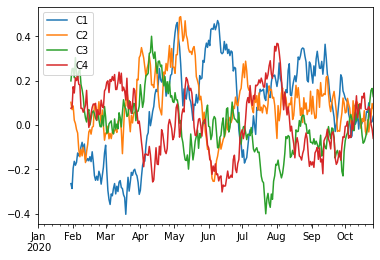

In [25]:
df.rolling(30).mean().plot()    # 30일치 이동평균

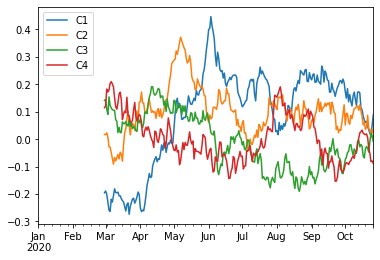

In [26]:
df.rolling(60).mean().plot()

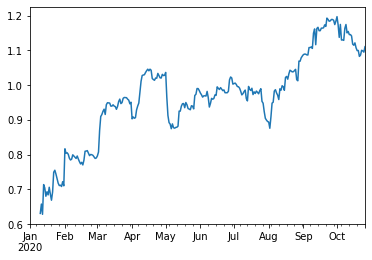

In [27]:
df.C1.rolling(60, min_periods=10).std().plot()

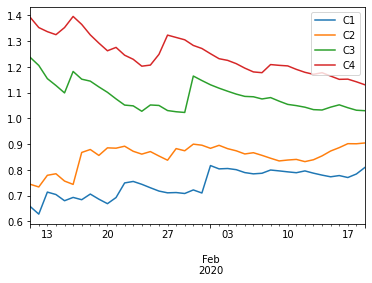

In [28]:
df.rolling(60, min_periods=10).std()[10:50].plot()    # 전체 기간이 아닌 일부 기간만 출력

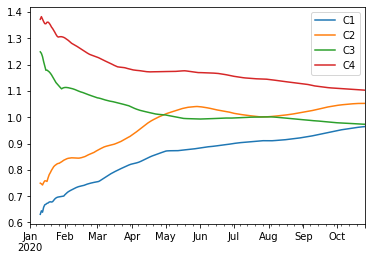

In [29]:
df.rolling(60, min_periods=10).std().expanding().mean().plot()

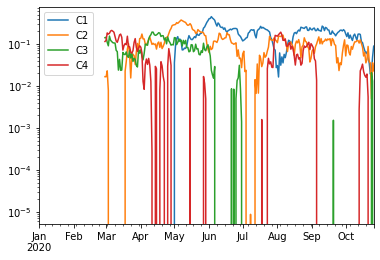

In [30]:
df.rolling(60).mean().plot(logy=True)    # y축을 로그스케일로 변환

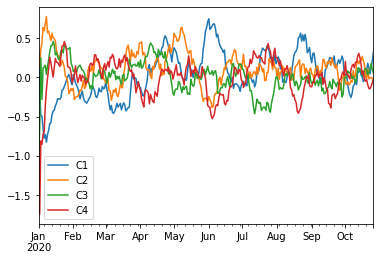

In [31]:
df.rolling('20D').mean().plot()

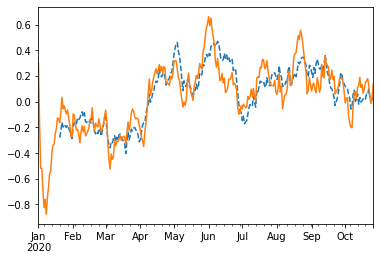

In [32]:
df.C1.rolling(30, min_periods=20).mean().plot(style='--', label='Simple MA')
df.C1.ewm(span=30).mean().plot(style='-', label='EWMA')

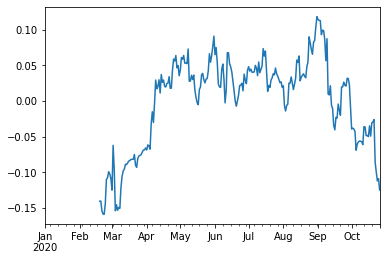

In [34]:
df.C1.rolling(100, min_periods=50).corr(df.C3).plot()

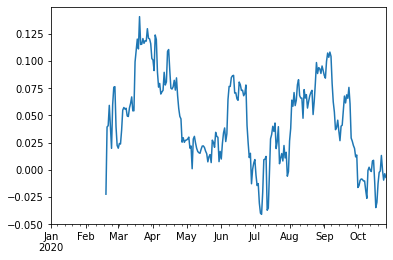

In [35]:
df.C2.rolling(100, min_periods=50).corr(df.C4).plot()